This file is the main file where we define the problem data, initiate model and train the model

1. First we import all the relevant classes and libraries

In [1]:
from physicsinformed import PhysicsInformedBarModel # py file which contains custom class for training
import numpy as np
import torch

Custom function needed to generate training and testing data

In [2]:
def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    # Reshape on a column tensor and return
    return x.view(samples, 1)

In [3]:
L = 1
x = generate_grid_1d(L)

2. Analytical solution for validation

In [4]:
u_analytic = lambda x: np.sin(2 * np.pi * x / L)

3. Problem data are defined. Here the known data like mechanical parameters, boundary condition and loading conditions are defined

In [5]:
E = 1
A = 1
u0 =  0 # Dirichlet boundary conditions for both edges. give in the form of list
distLoad = lambda x: 0.0

4. Next we generate the neural network model using the imported class PhysicsInformedBarModel

In [6]:
pinnModel = PhysicsInformedBarModel(x, E, A, L, u0, dist_load=distLoad) # use the designed custom class from physicsinformed.py file

5. Next we train our model. The method/function 'train' is defined in the class PhysicsInformedBarModel

In [5]:
epochs = 500
learningRate = 1e-2

pinnModel.train(epochs, optimizer='LBFGS', lr=learningRate) # function defined in custom class for training

Epoch: 0/499		Differential equation loss = 14761.091797		Boundary condition loss = 0.009410		Total loss = 14761.101562
Epoch: 100/499		Differential equation loss = 0.026868		Boundary condition loss = 0.000051		Total loss = 0.026919
Epoch: 200/499		Differential equation loss = 0.020703		Boundary condition loss = 0.000021		Total loss = 0.020724
Epoch: 300/499		Differential equation loss = 0.004386		Boundary condition loss = 0.000075		Total loss = 0.004461
Epoch: 400/499		Differential equation loss = 0.000772		Boundary condition loss = 0.000005		Total loss = 0.000776
Epoch: 499/499		Differential equation loss = 0.000797		Boundary condition loss = 0.000000		Total loss = 0.000797


6. We generate sample test data using utilities library and then predict the displacements at those test points

In [6]:
samples = 100
x_test = generate_grid_1d(L, samples)
u_test = pinnModel.get_displacements(x_test) # function defined in the custom class to get model predicted values

7. We plot predicted displacements at test points and also the training history

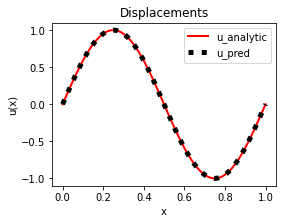

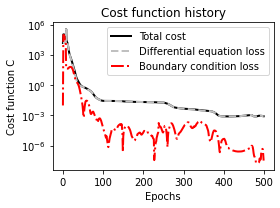

In [7]:
# plot the results and training losses. Refer the pptx file results slide for more information
